In [421]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import time
from sklearn.neural_network import MLPClassifier
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split

from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [422]:
from sklearn.datasets import load_iris

iris = load_iris()
X=iris.data
y = iris.target
df=pd.DataFrame(iris['data'],columns=iris['feature_names'])
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [423]:
def model_fit_and_predict(train_x, train_y, test_x, test_y):
    mlp = MLPClassifier(hidden_layer_sizes=(10,5),max_iter=1000)
    start = time.time()
    mlp.fit(train_x,train_y)
    stop = time.time()
    print(f"Training time: {stop - start}s")
    predict = mlp.predict(test_x)
    print("Accuracy: ", accuracy_score(predict, test_y))
    print("Confusion Matrix")
    conf_mat = confusion_matrix(predict,test_y)
    print(conf_mat)
    print("Performance Evaluation")
    print(classification_report(predict,test_y))

In [424]:
def kmeans_cluster(X, y, plot):
    Kmean = KMeans(n_clusters=3)
    Kmean.fit(X)
    centers = Kmean.cluster_centers_
    plot.figure(figsize=(8,6))
    fig, ax = plot.subplots()
    scatter = ax.scatter(X[:,0],X[:,1],s=50,c=y)
    ax.scatter(centers[:,0],centers[:,1], s=200,marker='s',c='r')
    legend1 = ax.legend(*scatter.legend_elements(),
                    loc="lower left", title="Classes")
    ax.add_artist(legend1)
    plot.xlabel('First principle component')
    plot.ylabel('Second principle component')
    

In [425]:
xtrain,xtest,ytrain,ytest = train_test_split(X,y,test_size=0.35)

In [426]:
model_fit_and_predict(xtrain,ytrain,xtest,ytest)

Training time: 0.40201640129089355s
Accuracy:  0.9433962264150944
Confusion Matrix
[[20  0  0]
 [ 0 16  2]
 [ 0  1 14]]
Performance Evaluation
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        20
           1       0.94      0.89      0.91        18
           2       0.88      0.93      0.90        15

    accuracy                           0.94        53
   macro avg       0.94      0.94      0.94        53
weighted avg       0.94      0.94      0.94        53



<Figure size 576x432 with 0 Axes>

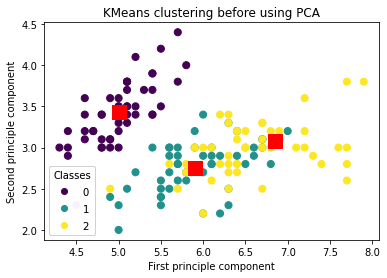

In [427]:
kmeans_cluster(X, y, plt)
plt.title("KMeans clustering before using PCA")
plt.show()

In [428]:
def PCA(X , num_components):
     
    #Step-1
    X_meaned = X - np.mean(X , axis = 0)
     
    #Step-2
    cov_mat = np.cov(X_meaned , rowvar = False)
     
    #Step-3
    eigen_values , eigen_vectors = np.linalg.eigh(cov_mat)
     
    #Step-4
    sorted_index = np.argsort(eigen_values)[::-1]
    sorted_eigenvalue = eigen_values[sorted_index]
    sorted_eigenvectors = eigen_vectors[:,sorted_index]
     
    #Step-5
    eigenvector_subset = sorted_eigenvectors[:,0:num_components]
     
    #Step-6
    X_reduced = np.dot(eigenvector_subset.transpose() , X_meaned.transpose() ).transpose()
     
    return X_reduced

In [429]:
X_modified = PCA(X, num_components=2)


In [430]:
xtrain,xtest,ytrain,ytest = train_test_split(X_modified,y,test_size=0.35)

In [431]:
model_fit_and_predict(xtrain,ytrain,xtest,ytest)

Training time: 0.40332937240600586s
Accuracy:  0.9622641509433962
Confusion Matrix
[[20  0  0]
 [ 0 17  1]
 [ 0  1 14]]
Performance Evaluation
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        20
           1       0.94      0.94      0.94        18
           2       0.93      0.93      0.93        15

    accuracy                           0.96        53
   macro avg       0.96      0.96      0.96        53
weighted avg       0.96      0.96      0.96        53



<Figure size 576x432 with 0 Axes>

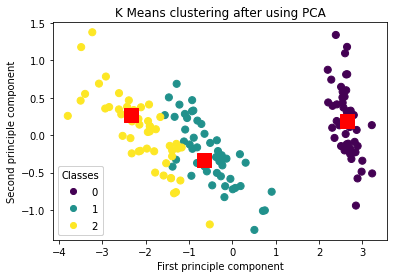

In [432]:
kmeans_cluster(X_modified,y, plt)
plt.title("K Means clustering after using PCA")
plt.show()